LINEAR REGRESSION
THE NORMAL EQUATION

In [3]:
import numpy as np
import sys
import sklearn
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)

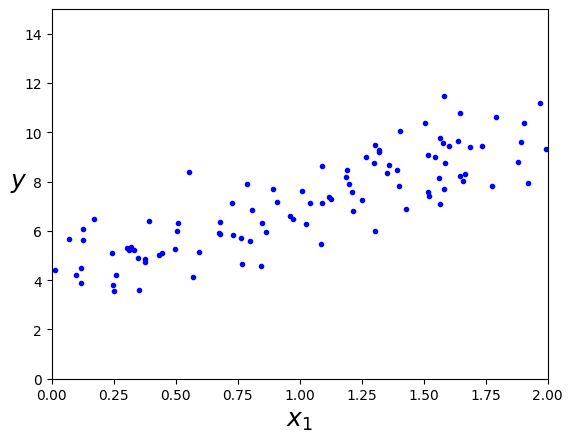

In [4]:
plt.plot(x,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [5]:
x_b=np.c_[np.ones((100,1)),x]
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[4.1675583 ],
       [2.93445712]])

In [6]:
x_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new]
print(x_new_b)
y_predict=x_new_b.dot(theta_best)
y_predict

[[1. 0.]
 [1. 2.]]


array([[ 4.1675583 ],
       [10.03647255]])

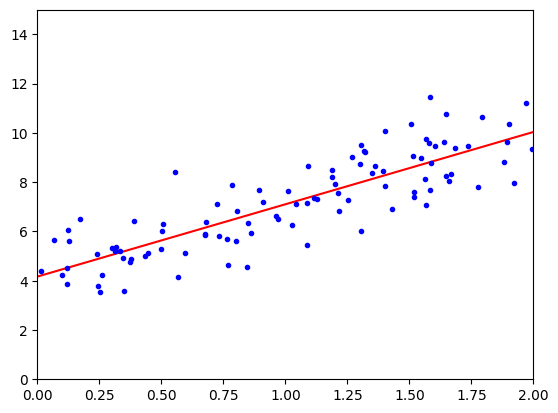

In [7]:
plt.plot(x_new,y_predict,'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.1675583]), array([[2.93445712]]))

In [9]:
lin_reg.predict(x_new)

array([[ 4.1675583 ],
       [10.03647255]])

In [10]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(x_b,y,rcond=1e-6)
theta_best_svd

array([[4.1675583 ],
       [2.93445712]])

In [11]:
np.linalg.pinv(x_b).dot(y)

array([[4.1675583 ],
       [2.93445712]])

In [12]:
u,s,v=np.linalg.svd(x_b)
s

array([14.84258904,  3.7251421 ])

GRADIENT DESCENT

In [13]:
eta=0.1
n_iterations=1000
m=100
theta=np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients=2/m*x_b.T.dot(x_b.dot(theta)-y)
    theta=theta-eta*gradients
theta

array([[4.1675583 ],
       [2.93445712]])

In [14]:
x_new_b.dot(theta)

array([[ 4.1675583 ],
       [10.03647255]])

In [15]:
theta_path_bgd=[]
def plot_gradient_descent(theta,eta,theta_path=None):
    m=len(x_b)
    plt.plot(x,y,'b.')
    n_iterations=1000
    for iteration in range(n_iterations):
        if iteration<10:
            y_predict=x_new_b.dot(theta)
            style='b-' if iteration>0 else"r--"
            plt.plot(x_new,y_predict,style)
        gradients=2/m*x_b.T.dot(x_b.dot(theta)-y)
        theta=theta-eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$",fontsize=18)
    plt.axis([0,2,0,15])
    plt.title(r"$eta={}$".format(eta),fontsize=16)


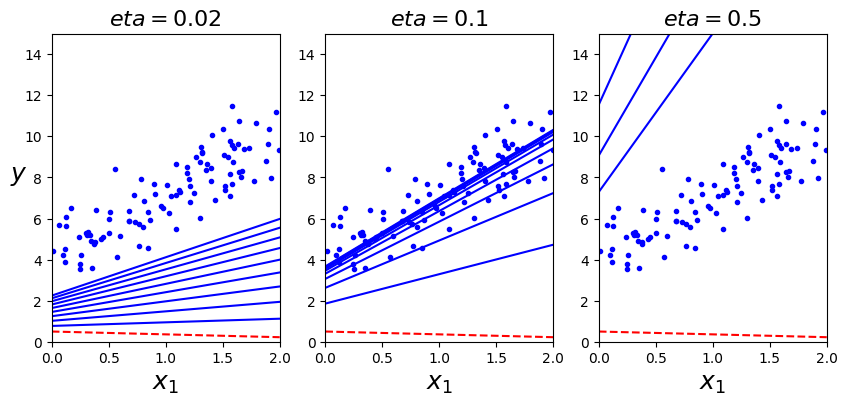

In [16]:
np.random.seed(42)
theta=np.random.randn(2,1)
plt.figure(figsize=(10,4))
plt.subplot(131);plot_gradient_descent(theta,eta=0.02)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(132);plot_gradient_descent(theta,eta=0.1,theta_path=theta_path_bgd)
plt.subplot(133);plot_gradient_descent(theta,eta=0.5)
plt.show()

STOCHASTIC GRADIENT DESCENT

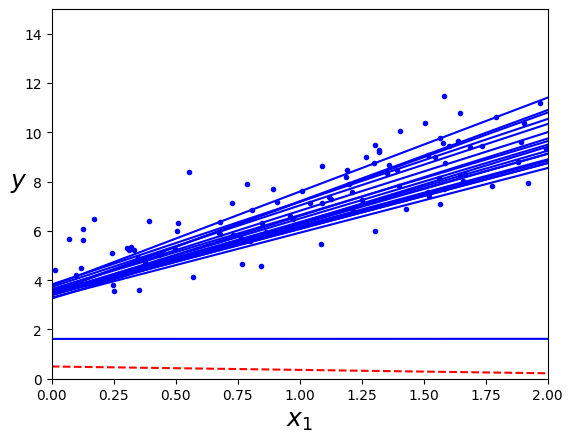

In [17]:
theta_path_sgd=[]
m=len(x_b)
np.random.seed(42)
n_epochs=50
t0,t1=5,50
def learning_schedule(t):
    return t0/(t+t1)
theta=np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        if epoch==0 and i<20:
            y_predict=x_new_b.dot(theta)
            style="b-" if i>0 else "r--"
            plt.plot(x_new,y_predict,style)
        random_index=np.random.randint(m)
        xi=x_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
        theta_path_sgd.append(theta)
plt.plot(x,y,'b.')
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [18]:
theta


array([[4.16756972],
       [2.95771396]])

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1,random_state=42)
sgd_reg.fit(x,y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [20]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.15832256]), array([2.94571239]))

Mini-batch Gradient descent

In [21]:
theta_path_mgd=[]
n_iterations=50
minibatch_size=20
np.random.seed(42)
theta=np.random.randn(2,1)
t0,t1=200,1000
def learning_schedule(t):
    return t0/(t+t1)
t=0
for epoch in range(n_iterations):
    shuffled_indices=np.random.permutation(m)
    x_b_shuffled=x_b[shuffled_indices]
    y_shuffled=y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t+=1
        xi=x_b_shuffled[i:i+minibatch_size]
        yi=y_shuffled[i:i+minibatch_size]
        gradients=2/minibatch_size*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(t)
        theta=theta-eta*gradients
        theta_path_mgd.append(theta)

In [22]:
theta

array([[4.1821329 ],
       [2.99143532]])

In [23]:
theta_path_bgd=np.array(theta_path_bgd)
theta_path_sgd=np.array(theta_path_sgd)
theta_path_mgd=np.array(theta_path_mgd)


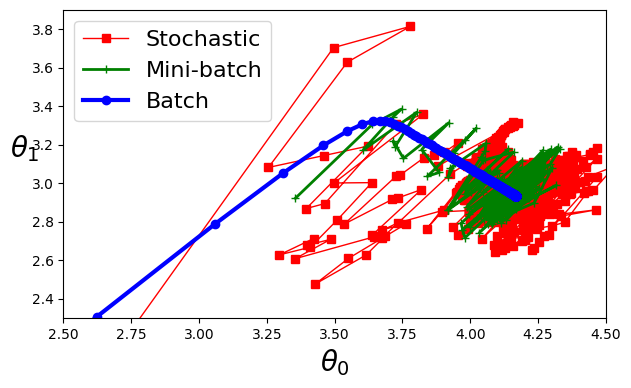

In [24]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],"r-s",linewidth=1,label="Stochastic")
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],"g-+",linewidth=2,label="Mini-batch")
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:, 1],"b-o",linewidth=3,label="Batch")
plt.legend(loc="upper left",fontsize=16)
plt.xlabel(r"$\theta_0$",fontsize=20)
plt.ylabel(r"$\theta_1$ ",fontsize=20,rotation=0)
plt.axis([2.5,4.5,2.3,3.9])
plt.show()

POLYNOMIAL REGRESSION

In [25]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

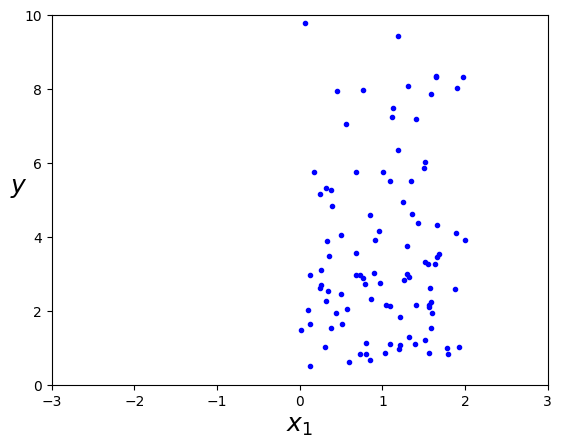

In [26]:
plt.plot(x,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.axis([-3,3,0,10])
plt.show()


In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([2.38942838])

In [28]:
X_poly[0]

array([2.38942838, 5.709368  ])

In [29]:
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

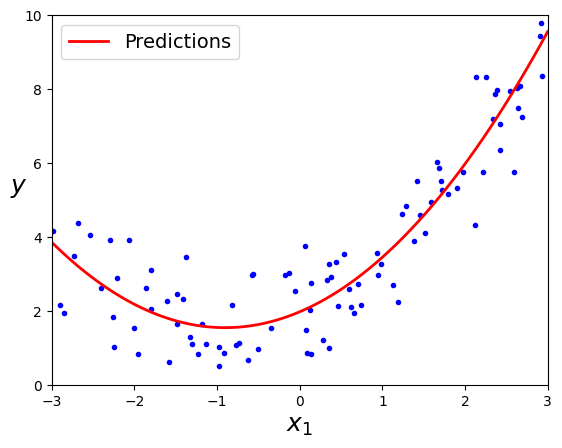

In [30]:
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly=poly_features.transform(X_new)
y_new=lin_reg.predict(X_new_poly)
plt.plot(X,y,"b.")
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",fontsize=18,rotation=0)
plt.legend(loc="upper left",fontsize=14)
plt.axis([-3,3,0,10])
plt.show()

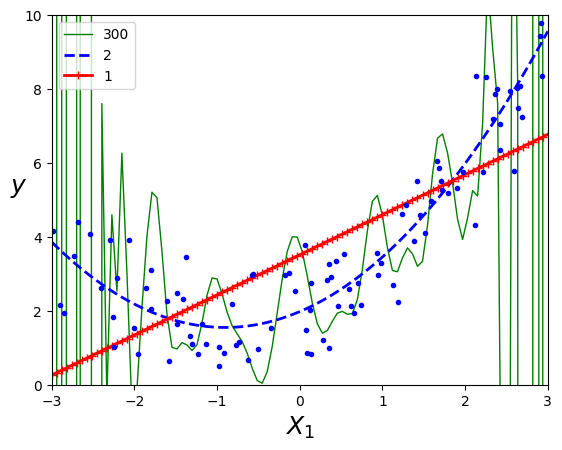

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
for style,width,degree in(("g-",1,300),("b--",2,2),("r-+",2,1)):
    polybig_features=PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler=StandardScaler()
    lin_reg=LinearRegression()
    polynomial_reg=Pipeline([
        ("poly_features",polybig_features),
        ("std_scaler",std_scaler),
        ("lin_reg",lin_reg),
    ])
    polynomial_reg.fit(X,y)
    y_newbig=polynomial_reg.predict(X_new)
    plt.plot(X_new,y_newbig,style,label=str(degree),linewidth=width)
plt.plot(X,y,"b.",linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$X_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

LEARNING CURVES

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),'b-',linewidth=4,label='val')
    plt.legend(loc="upper right",fontsize=14)
    plt.xlabel("Training set size",fontsize=14)
    plt.ylabel("RMSE",rotation=90,fontsize=14)

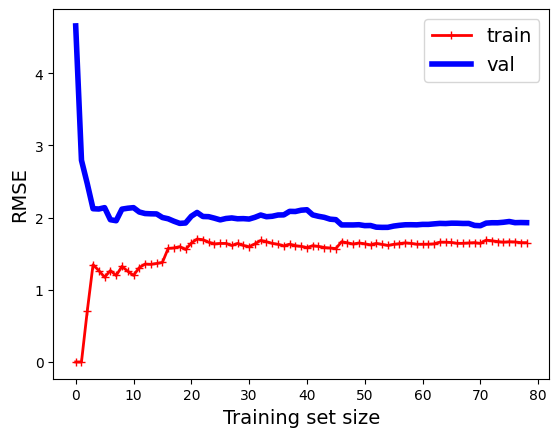

In [33]:
plot_learning_curves(lin_reg,X,y)

In [34]:
polynomial_reg=Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression()),
])

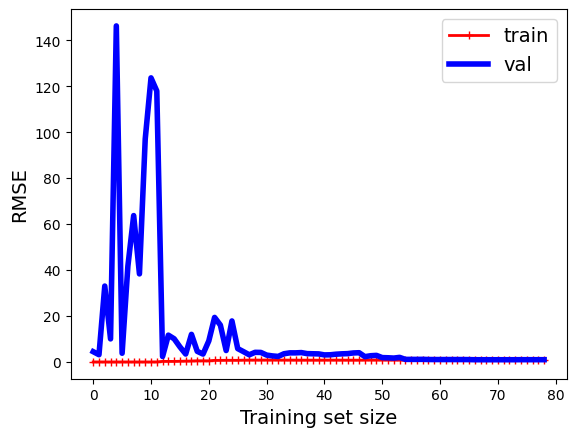

In [35]:
plot_learning_curves(polynomial_reg,X,y)

RIDGE REGRESSION(Tikhonov)

In [36]:
m=20
X=3*np.random.rand(m,1)
y=1+0.5*X+np.random.randn(m,1)/1.5
X_new=np.linspace(0,3,100).reshape(100,1)

In [37]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver="cholesky",random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.56411184]])

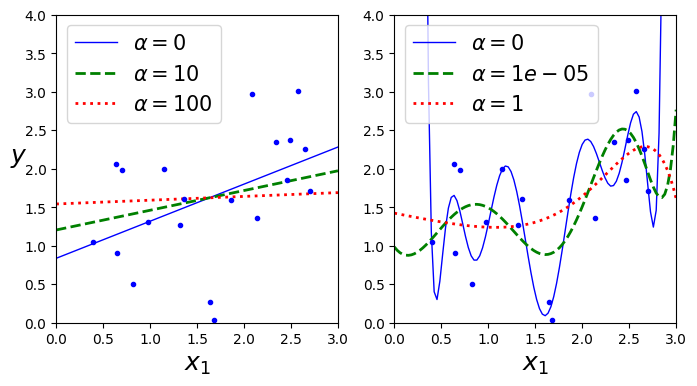

In [38]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

In [39]:
sgd_reg=SGDRegressor(penalty= "l2",max_iter=1000,tol=1e-3,random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.45960534])

LASSO REGRESSION

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.653e+00, tolerance: 1.250e-03
  model = cd_fast.enet_coordinate_descent(


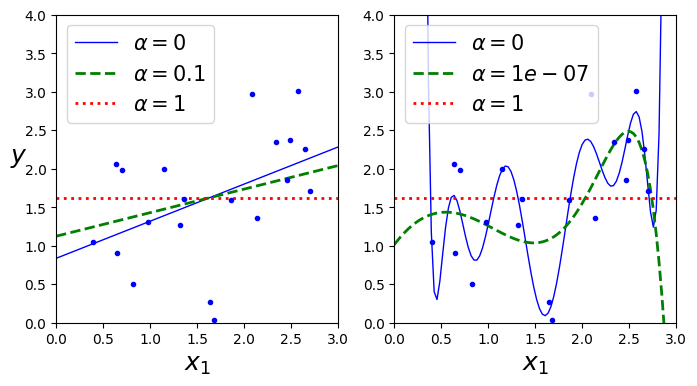

In [40]:
from sklearn.linear_model import Lasso
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso,polynomial=False,alphas=(0,0.1,1),random_state=42)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(122)
plot_model(Lasso,polynomial=True,alphas=(0,10**-7,1),random_state=42)
plt.show()

In [41]:
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.58211786])

ELASTIC NET

In [42]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.57473993])

EARLY STOPPING

In [43]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [44]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

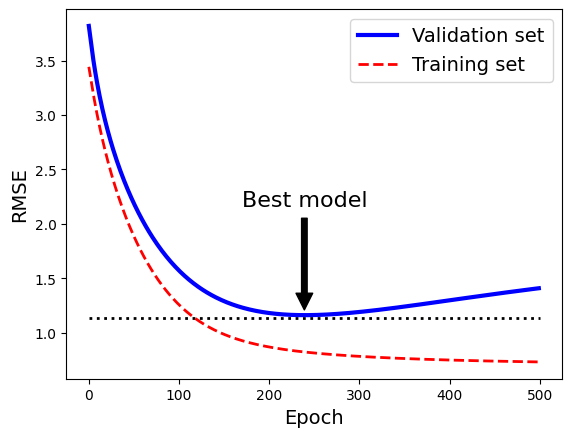

In [45]:
sgd_reg=SGDRegressor(max_iter=1,tol=None,warm_start=True,penalty=None,learning_rate="constant",eta0=0.0005,random_state=42)
n_epochs=500
train_errors,val_errors=[],[]
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_train_predict=sgd_reg.predict(X_train_poly_scaled)
    y_val_predict=sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train,y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
best_epoch=np.argmin(val_errors)
best_val_rmse=np.sqrt(val_errors[best_epoch])
plt.annotate('Best model',
             xy=(best_epoch,best_val_rmse),
             xytext=(best_epoch,best_val_rmse+1),
             ha="center",
             arrowprops=dict(facecolor='black',shrink=0.05),
             fontsize=16,
             )
best_val_rmse-=0.03
plt.plot([0,n_epochs],[best_val_rmse,best_val_rmse],"k:",linewidth=2)
plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="Validation set")
plt.plot(np.sqrt(train_errors),"r--",linewidth=2,label="Training set")
plt.legend(loc="upper right",fontsize=14)
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("RMSE",fontsize=14)
plt.show()

In [46]:
best_epoch,best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=None, warm_start=True))

In [52]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

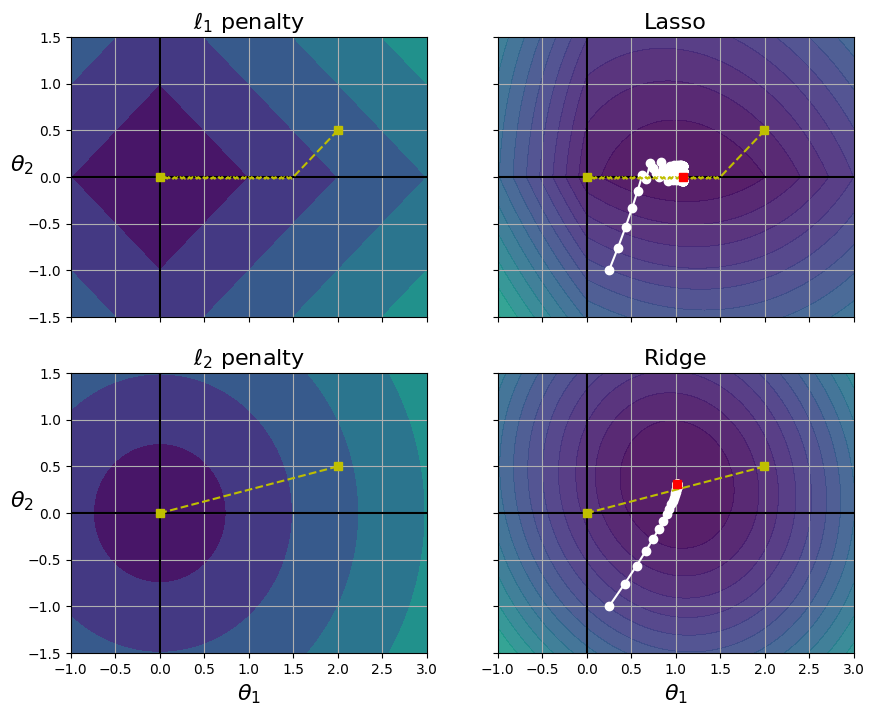

In [53]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)


plt.show()